In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
dfShots = pd.read_csv('cl-shots-2012.csv', index_col=0, na_values='N/A')
#dfShots.describe()
dfShots.head()

         dist      dx      dy                              event_id   goal  \
0   28.989564  28.245   6.528  4fc58cdd-544b-4c05-8b2f-1cdc3d5a8164  False   
2   19.254175 -18.585   5.032  764b87c7-426b-45da-9921-9e0556b90922  False   
8   25.772814 -20.790 -15.232  a276c188-492e-4ada-8168-5bee7e998cc7  False   
10  35.180567  33.810  -9.724  b5f9dd79-14ff-4671-ad3a-a198abfa24a8  False   
12  13.755000  13.755   0.000  3a0178d9-67c8-4018-b18e-cceb3fbbdf48  False   

                                 play_id           player  shot  \
0   699caaab-f4d6-411c-b7ef-737ec6d23196  James Rodríguez  True   
2   373c02f2-81ff-4b46-b2df-16629800c8fb           Sammir  True   
8   e190760e-9912-4d36-99f7-a1ceb696b5da         Duje Čop  True   
10  1204aee1-6925-48b1-92af-d70fa87b888f           Maicon  True   
12  a968c9e5-6f17-48ab-9081-7210ce10b3ed     Miguel Lopes  True   

             team       x       y  
0           Porto  76.755  28.832  
2   Dinamo Zagreb  18.585  27.404  
8   Dinamo Zagreb  2

array([[28.9895637946, 28.245, 6.528, ..., 'Porto', 76.755,
        28.831999999999997],
       [19.254174845999998, -18.585, 5.032, ..., 'Dinamo Zagreb', 18.585,
        27.404],
       [25.772813660900002, -20.79, -15.232000000000001, ...,
        'Dinamo Zagreb', 20.79, 48.28],
       ...,
       [19.6360597117, -19.635, -0.204, ..., 'Bayern', 19.635, 32.028],
       [6.829950585469999, -6.615, 1.7, ..., 'Bayern', 6.615,
        34.748000000000005],
       [15.5112428902, 10.92, 11.015999999999998, ..., 'Dortmund', 94.08,
        20.535999999999998]], dtype=object)

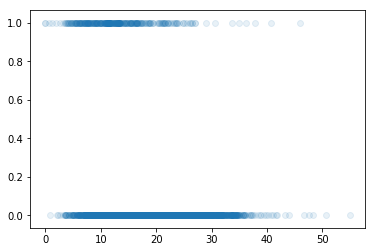

In [27]:
plt.scatter(dfShots.dist, dfShots.goal, alpha=0.1)

Text(0.5,0,'distance (m)')

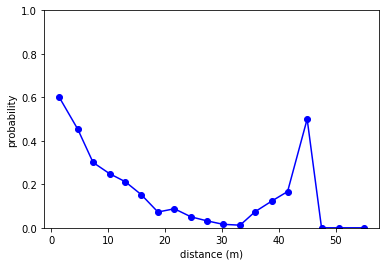

In [44]:
#上面这样的散点图，不足以得到距离和进球状况的关系，尤其是因为，大家其实知道，进不进去是一个2元的变量(0或者1)
#那咋办呢，为了更好地展示结果，咱们把相同距离的射门状况统计一下，然后算一个概率(平均状况)吧。
bins = np.linspace(dfShots.dist.min(), dfShots.dist.max(), 20)
groups = dfShots.groupby(np.digitize(dfShots.dist, bins))
chart = groups[['dist','goal']].mean()
plt.plot(chart.dist, chart.goal, 'bo-')
plt.ylim(0,1)
plt.ylabel('probability')
plt.xlabel('distance (m)')

In [49]:
dfShots[dfShots.dist > 40]
len(dfShots[dfShots.dist > 40])
dfShots[dfShots.dist > 40].count()

dist        14
dx          14
dy          14
event_id    14
goal        14
play_id     14
player      14
shot        14
team        14
x           14
y           14
dtype: int64

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo('HhJ84p9KLKY')

In [69]:
##技术不到家啊，逻辑回归还没有掌握，先不管了  算法之后会深入学习
#统计建模，预测进球率，可以看出是一个二分类问题，完全可以用逻辑回归
# from sklearn.linear_model import RandomizedLogisticRegression as RLR
# rlr = RLR()
# rlr.fit([dfShots['dist']], [dfShots['goal']])
# rlr.get_support()
# print(u'通过随机逻辑回归模型筛选特征结束。')
# print(u'有效特征为：%s' % ','.join(data.columns[rlr.get_support()]))
# x = data[data.columns[rlr.get_support()]].as_matrix() #筛选好特征
from sklearn.linear_model import LogisticRegression as LR
lr = LR() #建立逻辑回归模型
lr.fit(dfShots['dist'], [dfShots['goal']]) #用筛选后的特征数据来训练模型
print(u'逻辑回归模型训练结束。')
print(u'模型的平均正确率为：%s' % lr.score(x, y)) #给出模型的平均正确率，本例为81.4%

ValueError: Expected 2D array, got 1D array instead:
array=[28.98956379 19.25417485 25.77281366 ... 19.63605971  6.82995059
 15.51124289].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

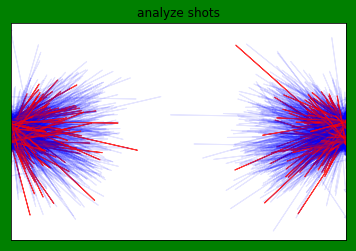

In [90]:
x_size = 105.0
y_size = 68.0
#set up field    
fig = plt.figure()
fig.patch.set_facecolor('green')
axes = fig.add_subplot(1, 1, 1)
axes.xaxis.set_visible(False)
axes.yaxis.set_visible(False)
plt.xlim([0,x_size])
plt.ylim([0,y_size])

#draw shots
for i, row in enumerate(dfShots.values):
    size = 1
    if row[4]:
        color = 'red'
        alpha = 0.8
    else:
        color = 'blue'
        alpha = 0.1
    plt.arrow(row[9],row[10],row[1],row[2],fc=color, ec=color, head_width=size, head_length=size, alpha=alpha)

plt.title(u'analyze shots')
plt.show()